In [14]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
%matplotlib inline

In [15]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

In [16]:
def get_data_simple_connect(data):
    return np.hstack((data,data))

In [17]:
def get_data_even_connect(data):
    return np.hstack((data,data[::-1]))

In [18]:
# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
        result[i] = data[i] - ((right-left)*i/(points-1) + left)
    
    return result

In [19]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c)

In [20]:
# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

# 画像の用意

In [21]:
AIRPLANE   = ImageLoader("Mono/Airplane.bmp")
BARBARA    = ImageLoader("Mono/BARBARA.bmp")
BOAT       = ImageLoader("Mono/BOAT.bmp")
BRIDGE     = ImageLoader("Mono/BRIDGE.bmp")
BUILDING   = ImageLoader("Mono/Building.bmp")
CAMERAMAN  = ImageLoader("Mono/Cameraman.bmp")
GIRL       = ImageLoader("Mono/girl.bmp")
LAX        = ImageLoader("Mono/LAX.bmp")
LENNA      = ImageLoader("Mono/LENNA.bmp")
LIGHTHOUSE = ImageLoader("Mono/Lighthouse.bmp")
TEXT       = ImageLoader("Mono/Text.bmp")
WOMAN      = ImageLoader("Mono/WOMAN.bmp")

In [22]:
Images = np.array(
    [
        AIRPLANE,BARBARA,BOAT,
        BRIDGE,BUILDING,CAMERAMAN,
        GIRL,LAX,LENNA,
        LIGHTHOUSE,TEXT,WOMAN
    ]
)

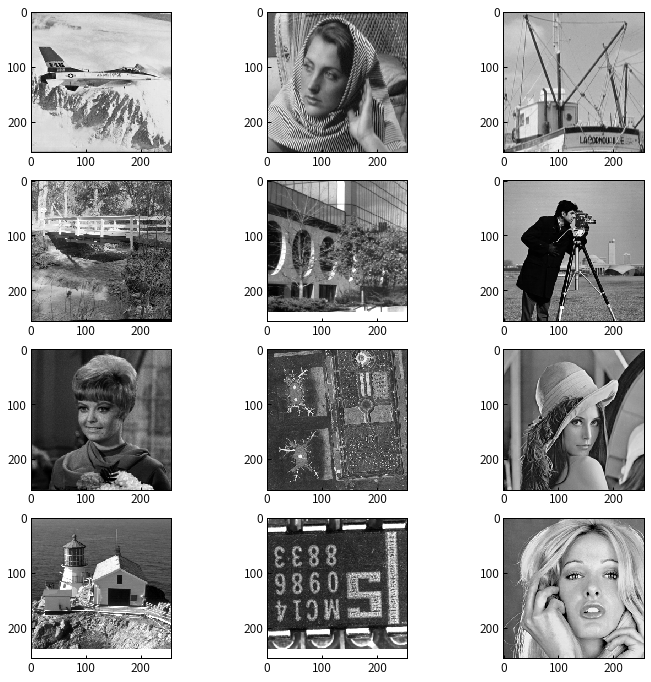

In [23]:
fig = plt.figure(figsize=(12,15))
for i in range(0,len(Images)):
    plt.subplot(len(Images)//3 + 1, 3 ,i+1)
    plt.imshow(Images[i].img,"gray")

# AIRPLANE

## DCT, DCT+ランチョス1

In [25]:
N = 16
dct = DCT(N)
LOOP_COUNT = 10000
AIRPLANE_F_DCT   = np.zeros(N)
AIRPLANE_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = AIRPLANE.get_points(N//2)
    data_L = Lanczos(data)
    
    AIRPLANE_F_DCT   += abs(dct.dct(get_data_even_connect(data)))
    AIRPLANE_F_DCT_L += abs(dct.dct(get_data_even_connect(data_L)))
    
AIRPLANE_F_DCT   /= LOOP_COUNT
AIRPLANE_F_DCT_L /= LOOP_COUNT

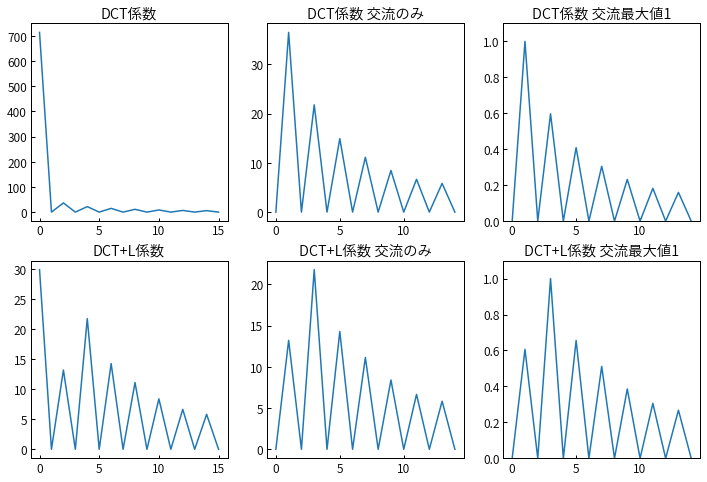

In [26]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(231)
ax1.plot(AIRPLANE_F_DCT)
ax1.title.set_text("DCT係数")

ax2 = fig.add_subplot(232)
ax2.plot(AIRPLANE_F_DCT[1:])
ax2.title.set_text("DCT係数 交流のみ")

ax3 = fig.add_subplot(233)
ax3.set_ylim(0,1.1)
ax3.plot(AIRPLANE_F_DCT[1:]/AIRPLANE_F_DCT[1:].max())
ax3.title.set_text("DCT係数 交流最大値1")

ax4 = fig.add_subplot(234)
ax4.plot(AIRPLANE_F_DCT_L)
ax4.title.set_text("DCT+L係数")

ax5 = fig.add_subplot(235)
ax5.plot(AIRPLANE_F_DCT_L[1:])
ax5.title.set_text("DCT+L係数 交流のみ")

ax6 = fig.add_subplot(236)
ax6.set_ylim(0,1.1)
ax6.plot(AIRPLANE_F_DCT_L[1:]/AIRPLANE_F_DCT_L[1:].max())
ax6.title.set_text("DCT+L係数 交流最大値1")

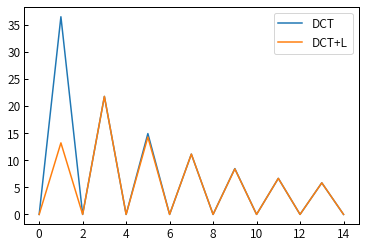

In [37]:
plt.plot(AIRPLANE_F_DCT[1:],label="DCT")
plt.plot(AIRPLANE_F_DCT_L[1:],label="DCT+L")
plt.legend()